## Implementing Decision Tree classifier on the famous Iris Dataset.

In [85]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
#Reading the Data
iris_dt = pd.read_csv("Iris.csv") 

### Data Exploration and Visualization

In [87]:
#checking the first five rows 
iris_dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
#checking the number of rows and columns in the dataset respectively.
iris_dt.shape 

(150, 6)

In [89]:
# checking out the statistical data of numerical columns in the dataset.
iris_dt.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


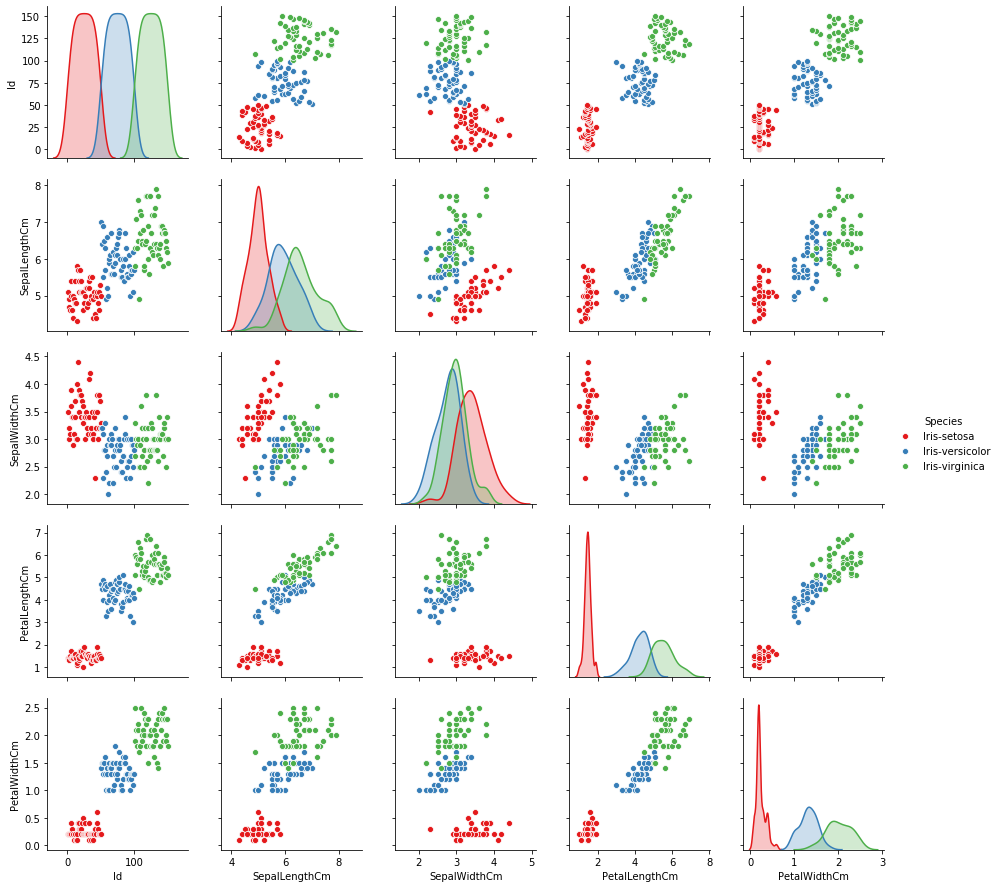

In [90]:
#plotting the pairplot for every feature to know the relationship between the two features setting hue as species.
#It is done to get to know which species are the more separated from each other?
sns.pairplot(iris_dt,hue="Species",palette='Set1') 

In [91]:
#To check the datatypes and also if there is any value which is null
iris_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Feature Engineering

In [92]:
# This is the function which is used to map the values of the species column from object to integer which is further used to classify all the three species.
def converter(species):
    if species=='Iris-virginica':
        return 2
    elif species=='Iris-setosa':
        return 0;
    else:
        return 1;

In [93]:
iris_dt["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [94]:
# we have used apply method on the column species of our original dataset which will map the values in species col according to the values which are defined in the converter function.
#  We will define a new Feature to our original dataset consisting of the mapped values for species column and drop the species column from the original dataset.Basically, it is a substitute function for get_dummies method. 
iris_dt["target"] = iris_dt["Species"].apply(converter)
iris_dt_new = iris_dt.drop(["Species"],axis =1)
iris_dt_new.head()
iris_dt_new["target"].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [95]:
 # checking the head of the new dataset to which we have done some feature engineering.
iris_dt_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Separating the dependent and independent variables.

In [96]:
#Setting the varibale x and the target variable y from the new dataset.
y = iris_dt_new["target"]
y = np.array(y)
x = iris_dt_new.drop(["target","Id"],axis=1)
x = np.array(x)
x.shape,y.shape


((150, 4), (150,))

### Building the Model

In [97]:
#Importing train_test_split and splitting the data into train 
#and test by keeping train data as 80% and test data as 20% with random state of 42.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [98]:
#Importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [99]:
#Making the instance of  DecisionTree by calling  DecisionTreeClassifier() without changing any parameters.
DTC = DecisionTreeClassifier()

In [100]:
#Getting all the default parameters of DecisionTreeClassifier().
DTC.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [101]:
# Fitting our training data
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
#Predicting the values from the classifier model based on training data(seen) first.
predict_train = DTC.predict(X_train)
predict_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

In [103]:
# Getting the dataframe for the comparsion of the predicted train value and actual train values.
data = pd.DataFrame({"predicted_value_train":predict_train,"actual_value_train":y_train})
data.head()

,predicted_value_train,actual_value_train
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [104]:
#Accuracy coming as 100%
DTC.score(X_train,y_train)

1.0

### Testing our model on the unseen(test) data.

In [105]:
#Predicting the values from the classifier model based on testing(unseen) data.
predict_test = DTC.predict(X_test)

In [106]:
#Accuracy of test data is 100%
DTC.score(X_test,y_test)

1.0

### Comparsion of the predicted test values with actual test values.

In [107]:
#Getting the dataframe for the comparsion of the predicted test value and actual test values.
df = pd.DataFrame({"predicted_value_test":predict_test,"actual_value_test":y_test})
df.head()

,predicted_value_test,actual_value_test
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [108]:
#Total predicted values from the dataset
y_predict = DTC.predict(x)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Evaluation

In [109]:
#for evaluation we are importing classification report which will give brief report of the model performance and confusion matrix
#which will tell about true positives and true negatives and false positives and false negatives.
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
#for test data
print(confusion_matrix(predict_test ,y_test))
print(classification_report(predict_test ,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [111]:
# the whole data
# we get 100% accuracy
print(confusion_matrix(y_predict,iris_dt_new["target"]))
print(classification_report(y_predict,iris_dt_new["target"]))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### Visualization of our  Results

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

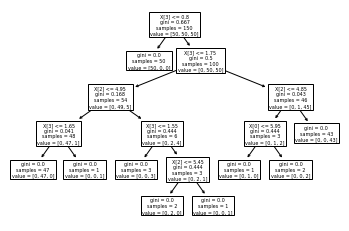

In [112]:
# One way of plotting a decision tree.
# Doing some visulizations on the result!!! Visualizing a Decision tree by importing tree from sklearn and plotting the tree on our data.
from sklearn import tree
tree.plot_tree(DTC.fit(x,y))

In [113]:
# Second way of plotting a tree which is more clear by importing export_graphviz
from sklearn.tree import export_graphviz

In [114]:
#We export our fitted decision tree as a .dot file, which is the standard extension for graphviz files. 
#The tree.dot file will be saved in the same directory as your Jupyter Notebook script.
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
export_graphviz(DTC, 'tree.dot', feature_names = FEATURE_NAMES)

In [115]:
# we will convert the .dot file to .png file.
! dot -Tpng tree.dot -o tree.png

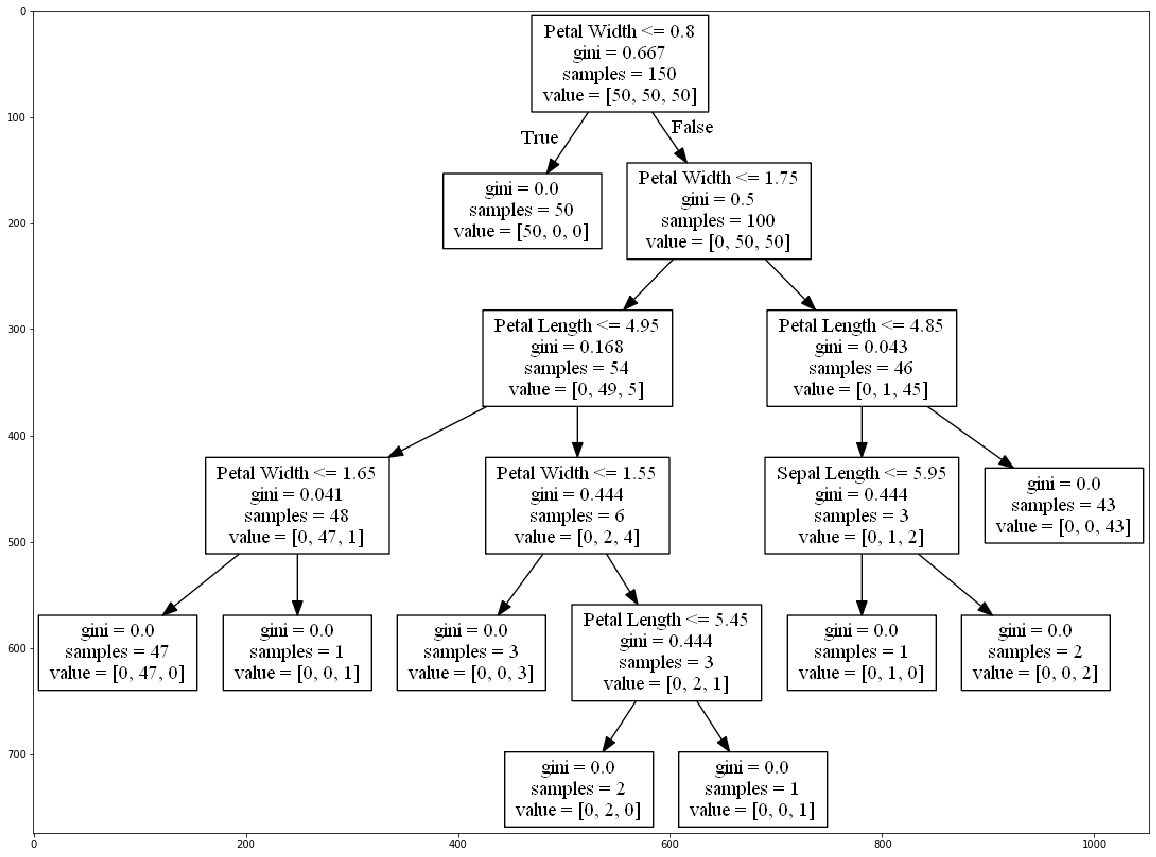

In [116]:
#we can easily display it, using well-known libraries like matplotlib and also using computer vision module
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

 ### Predicting the Species if any new values of it's Features are given.

In [117]:
#predicting new values
l=[]
l = list(map(float,input("Enter the 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' respectively : ").split()))
if DTC.predict([l])==0:
    print("The species with these feature's length belong to {} ".format("Iris-setosa"))
if DTC.predict([l])== 1:
    print("The species with these feature's length belong to {} ".format("Iris-versicolor"))
if DTC.predict([l])==2:
    print("The species with these feature's length belong to {} ".format("Iris-virginica"))

Enter the 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' respectively : 5.1 3.5 1.4 0.2
The species with these feature's length belong to Iris-setosa 
